<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-работы" data-toc-modified-id="Описание-работы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание работы</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>План работы</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Обзор-объединенного-датафрейма" data-toc-modified-id="Обзор-объединенного-датафрейма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обзор объединенного датафрейма</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Подготовка-к-обучению" data-toc-modified-id="Подготовка-к-обучению-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Подготовка к обучению</a></span></li><li><span><a href="#Обучение-базовых-моделей" data-toc-modified-id="Обучение-базовых-моделей-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Обучение базовых моделей</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li><li><span><a href="#Сравнение-с-DummyRegressor" data-toc-modified-id="Сравнение-с-DummyRegressor-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Сравнение с DummyRegressor</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Отчёт-о-проделанной-работе" data-toc-modified-id="Отчёт-о-проделанной-работе-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Отчёт о проделанной работе</a></span><ul class="toc-item"><li><span><a href="#Сравнение-с-планом" data-toc-modified-id="Сравнение-с-планом-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Сравнение с планом</a></span></li><li><span><a href="#Трудности-и-решения" data-toc-modified-id="Трудности-и-решения-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Трудности и решения</a></span></li><li><span><a href="#Ключевые-шаги-решения" data-toc-modified-id="Ключевые-шаги-решения-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Ключевые шаги решения</a></span></li><li><span><a href="#Используемые-признаки" data-toc-modified-id="Используемые-признаки-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Используемые признаки</a></span></li><li><span><a href="#Описание-лучшей-модели" data-toc-modified-id="Описание-лучшей-модели-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Описание лучшей модели</a></span></li></ul></li></ul></div>

# Оптимизация этапа обработки

### Описание работы

Металлургическому комбинату требуется уменьшить потребление электроэнергии на этапе обработки стали, что позволит сократить производственные расходы.

**Цель проекта:** Разработать модель, способную предсказывать, до какой температуры необходимо нагреть сталь, исходя из её химического состава и внутренних производственных факторов.

**Техпроцесс:**
1) Подогрев до определённой температуры

2) Повторяется до достижения целевого химического состава и оптимальной температуры плавки:

    - Измерение температуры и хим. состава
    - Десульфурация и легирование
    - Продувка инертным газом

**Описание данных:**

Данные состоят из файлов, полученных из разных источников:
- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` — данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

---

### Исследовательский анализ данных

Импортируем библиотеки.

In [2]:
import warnings
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor

# ignore warnings
warnings.simplefilter('ignore')

# RandomState
state = 170723

Загрузим и проверим данные:

In [3]:
data_arc_new = pd.read_csv('datasets/data_arc_new.csv', sep=',')

data_bulk_new = pd.read_csv('datasets/data_bulk_new.csv', sep=',')

data_bulk_time_new = pd.read_csv('datasets/data_bulk_time_new.csv', sep=',')

data_gas_new = pd.read_csv('datasets/data_gas_new.csv', sep=',')

data_temp_new = pd.read_csv('datasets/data_temp_new.csv', sep=',')

data_wire_new = pd.read_csv('datasets/data_wire_new.csv', sep=',')

data_wire_time_new = pd.read_csv('datasets/data_wire_time_new.csv', sep=',')

    
df_dict = {
    'data_arc_new': data_arc_new,
    'data_bulk_new': data_bulk_new,
    'data_bulk_time_new': data_bulk_time_new,
    'data_gas_new': data_gas_new,
    'data_temp_new': data_temp_new,
    'data_wire_new': data_wire_new,
    'data_wire_time_new': data_wire_time_new
}

Краткий обзор датафрейма data_arc_new

Первые 5 строк датафрейма:


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691



Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None

Описательные статистики датафрейма:


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


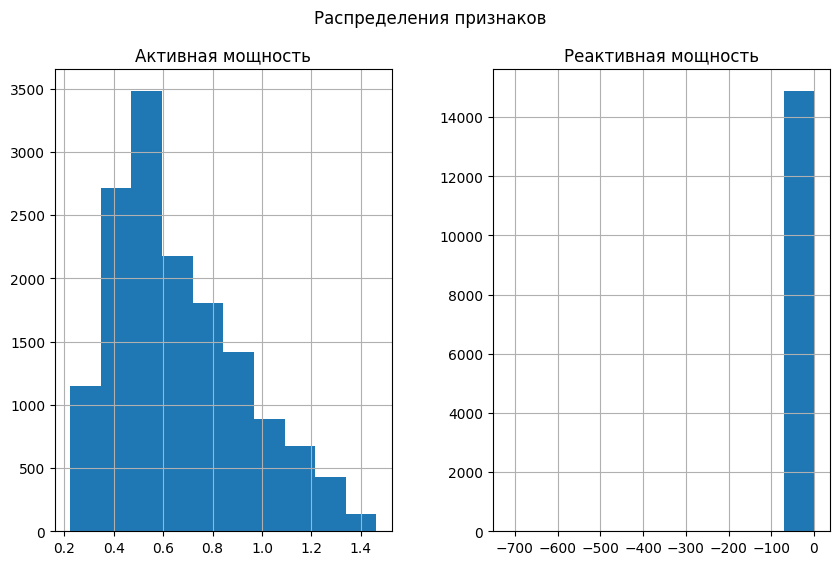

Корреляционная матрица Пирсона:


,Активная мощность,Реактивная мощность
Активная мощность,1.000000,0.031164
Реактивная мощность,0.031164,1.000000


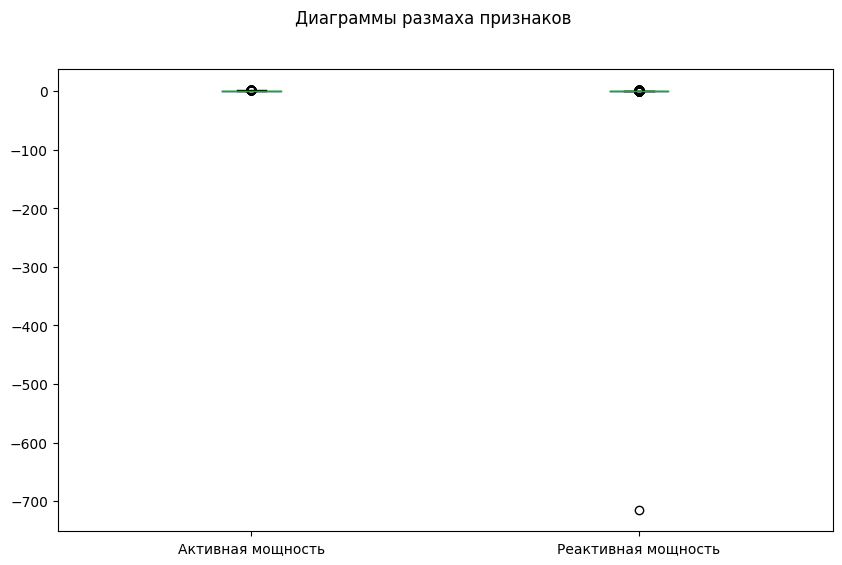

---------------------------------------------------------------------------------------------------------------

Краткий обзор датафрейма data_bulk_new

Первые 5 строк датафрейма:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None

Описательные статистики датафрейма:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


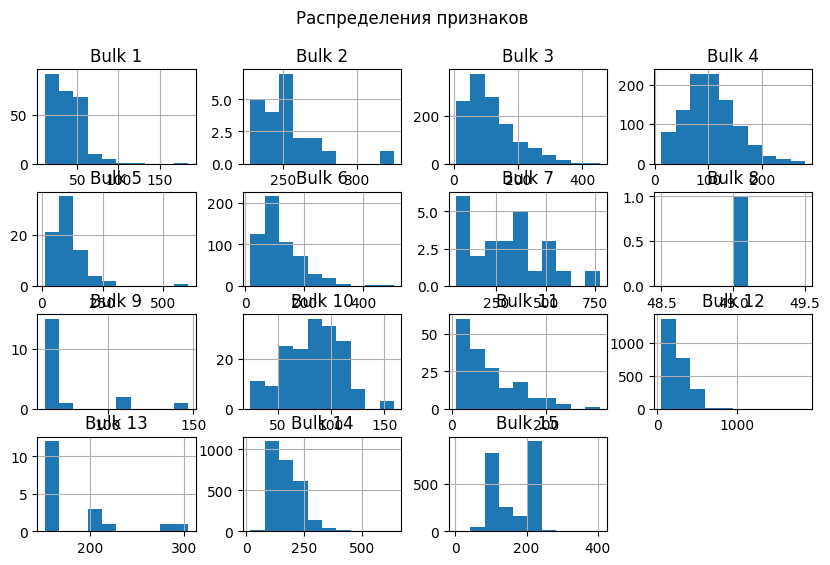

Корреляционная матрица Пирсона:


,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
Bulk 1,1.000000,-0.073762,0.016731,-0.040465,-0.368980,0.141745,-0.086223,nan,nan,-0.278055,0.461895,0.370501,1.000000,0.409188,-0.119006
Bulk 2,-0.073762,1.000000,nan,0.393882,0.070350,nan,-0.010043,nan,nan,nan,nan,nan,nan,nan,nan
Bulk 3,0.016731,nan,1.000000,-0.260918,0.144410,0.253080,nan,nan,0.072850,-0.244532,0.137997,0.011648,-0.582598,0.026257,-0.023689
Bulk 4,-0.040465,0.393882,-0.260918,1.000000,-0.077214,-0.333841,0.324940,nan,0.766565,-0.516399,nan,0.051112,-0.311659,0.022925,0.041190
Bulk 5,-0.368980,0.070350,0.144410,-0.077214,1.000000,-0.511112,0.304476,nan,nan,nan,nan,0.007650,nan,-0.256040,-0.248216
Bulk 6,0.141745,nan,0.253080,-0.333841,-0.511112,1.000000,nan,nan,nan,nan,-0.104251,-0.079822,0.844690,0.154429,-0.038363
Bulk 7,-0.086223,-0.010043,nan,0.324940,0.304476,nan,1.000000,nan,nan,nan,nan,0.538671,nan,1.000000,nan
Bulk 8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bulk 9,nan,nan,0.072850,0.766565,nan,nan,nan,nan,1.000000,nan,nan,0.946954,nan,-0.479974,nan
Bulk 10,-0.278055,nan,-0.244532,-0.516399,nan,nan,nan,nan,nan,1.000000,nan,-0.026418,nan,-0.248683,0.076409


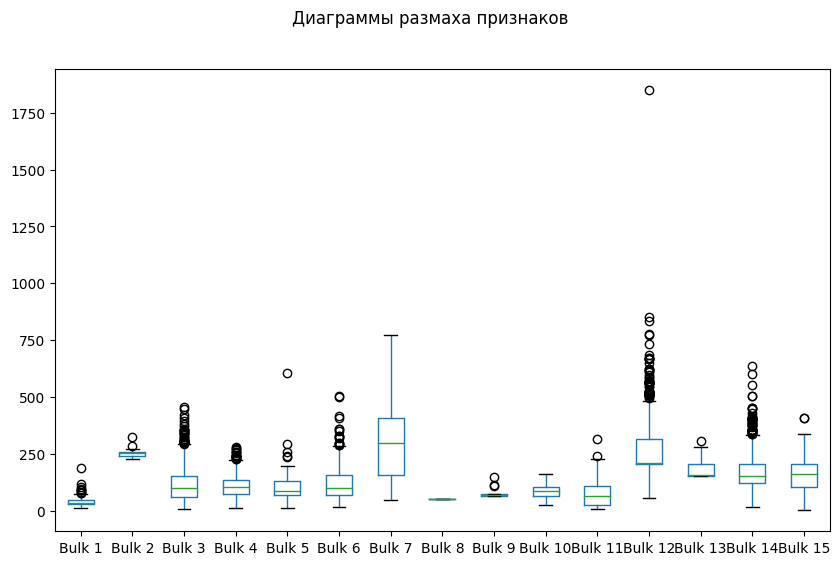

---------------------------------------------------------------------------------------------------------------

Краткий обзор датафрейма data_bulk_time_new

Первые 5 строк датафрейма:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47



Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None

Описательные статистики датафрейма:


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000



Краткий обзор датафрейма data_gas_new

Первые 5 строк датафрейма:


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None

Описательные статистики датафрейма:


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


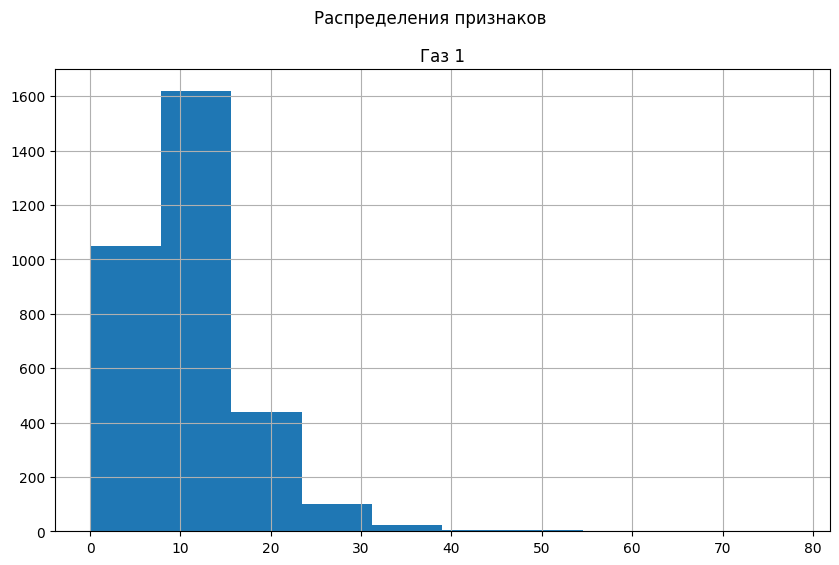

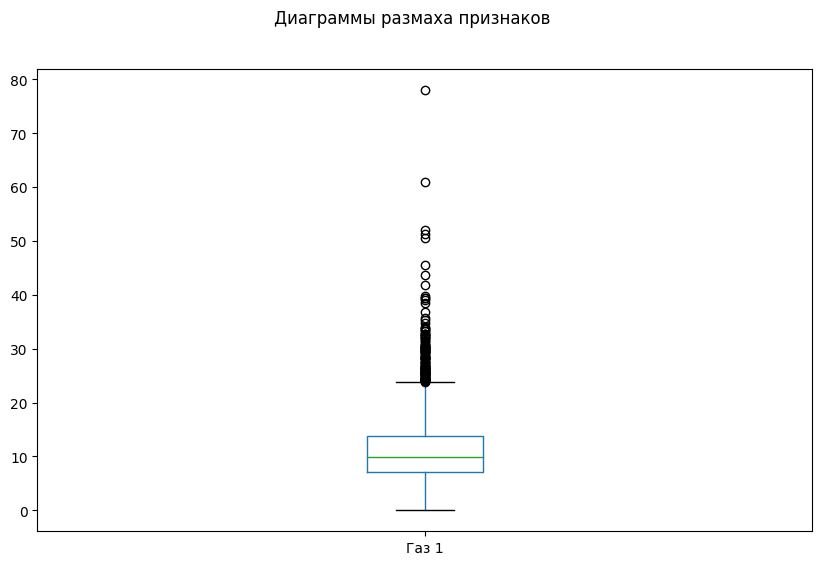

---------------------------------------------------------------------------------------------------------------

Краткий обзор датафрейма data_temp_new

Первые 5 строк датафрейма:


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0



Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB
None

Описательные статистики датафрейма:


,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


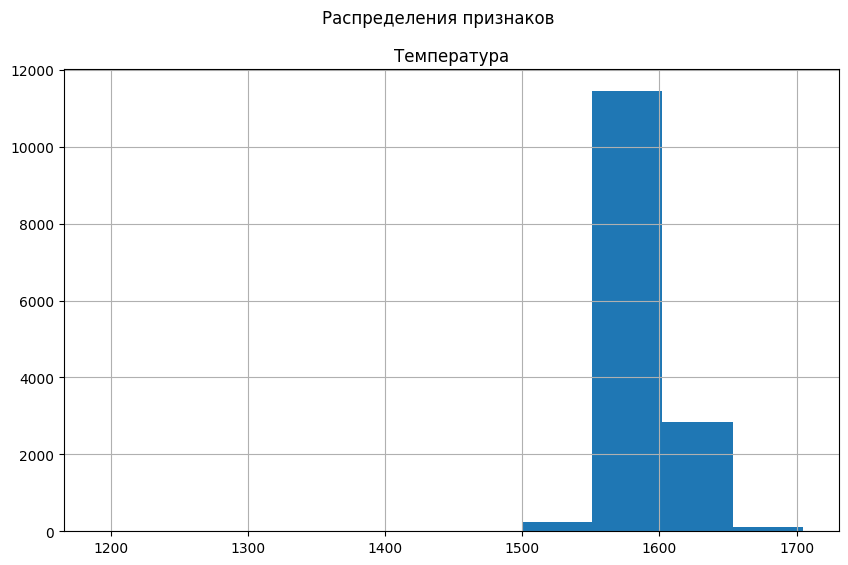

Корреляционная матрица Пирсона:


,Температура
Температура,1.000000


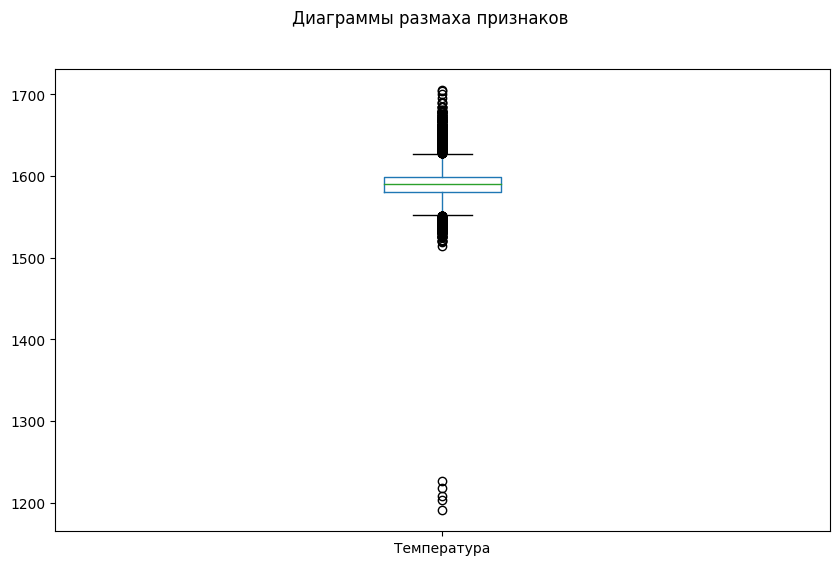

---------------------------------------------------------------------------------------------------------------

Краткий обзор датафрейма data_wire_new

Первые 5 строк датафрейма:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None

Описательные статистики датафрейма:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


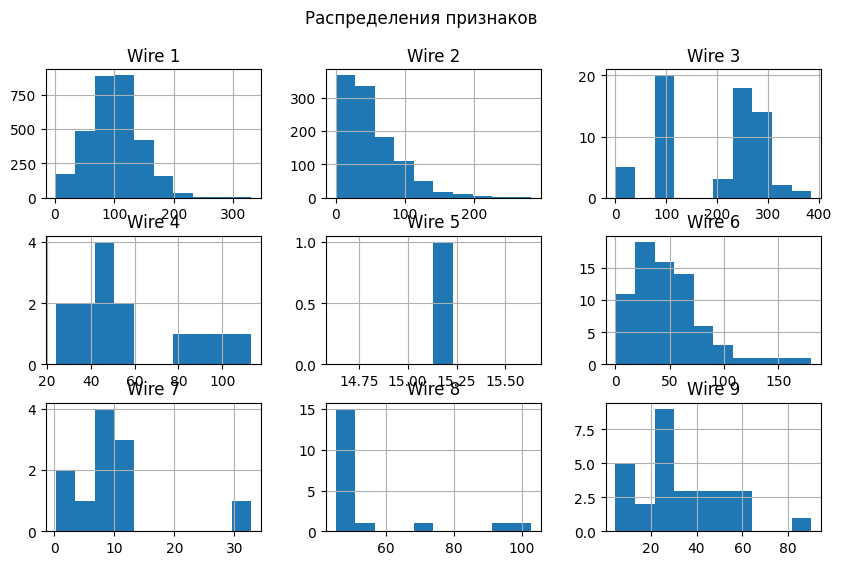

Корреляционная матрица Пирсона:


,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
Wire 1,1.000000,-0.030892,0.724370,0.054001,nan,-0.280807,-0.035072,0.068697,0.010104
Wire 2,-0.030892,1.000000,-0.081852,nan,nan,-0.265706,nan,0.250477,0.011019
Wire 3,0.724370,-0.081852,1.000000,0.069854,nan,-0.221602,-0.056948,nan,nan
Wire 4,0.054001,nan,0.069854,1.000000,nan,0.237456,-0.404865,nan,nan
Wire 5,nan,nan,nan,nan,nan,nan,nan,nan,nan
Wire 6,-0.280807,-0.265706,-0.221602,0.237456,nan,1.000000,-0.224093,nan,nan
Wire 7,-0.035072,nan,-0.056948,-0.404865,nan,-0.224093,1.000000,nan,nan
Wire 8,0.068697,0.250477,nan,nan,nan,nan,nan,1.000000,nan
Wire 9,0.010104,0.011019,nan,nan,nan,nan,nan,nan,1.000000


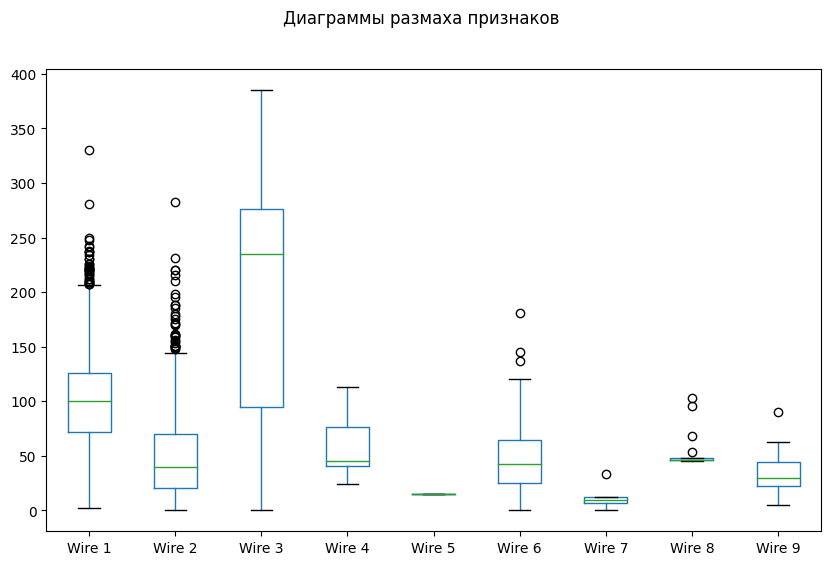

---------------------------------------------------------------------------------------------------------------

Краткий обзор датафрейма data_wire_time_new

Первые 5 строк датафрейма:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Основная информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None

Описательные статистики датафрейма:


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [4]:
for name, df in df_dict.items():
    print('Краткий обзор датафрейма', '\033[1m' + name + '\033[0m')
    print()
    print('Первые 5 строк датафрейма:')
    display(df.head(5))
    print()
    print('Основная информация о датафрейме:')
    print(df.info())
    print()
    print('Описательные статистики датафрейма:')
    display(df.describe())
    print()
    try:
        temp = df.drop('key', axis=1)
        temp.hist(figsize=(10,6))
        plt.suptitle("Распределения признаков")
        plt.show();
        if len(temp.columns) > 1:
            print('Корреляционная матрица Пирсона:')
            display(temp.corr().style.background_gradient(cmap ='seismic')\
                    .set_properties(**{'font-size': '12px'}))
        temp.plot(kind='box', figsize=(10,6))
        plt.suptitle("Диаграммы размаха признаков")
        plt.show();
    except:
        continue
    print('---------------------------------------------------------------------------------------------------------------')
    print()

**Вывод:** 
- В датафрейме `data_arc_new` имеется явный выброс в признаке `Реактивная мощность`. 
- В датафрейме `data_bulk_new` присутствует достаточно много пропусков. Самыми заполненными являются признаки `Bulk 3,4, 12, 14, 15` (имеют больше 1000 не пустых значений). Присутствует как ярко выраженная положительная корреляция между признаками (пример: `Bulk 4, 9`, `Bulk 6, 13`), так и достаточно сильная отрицательная корреляция (пример: `Bulk 3, 13` и `Bulk 4, 10`) Присутствует крайне высокая корреляция (Bulk 9, 12). Практически во всех признаках присутствуют выбросы, самый явный из них - в `Bulk 12`. 
- В `data_bulk_time_new` находятся datetime признаки для предыдущего датафрейма, возможно NaN-значения в них совпадают. 
- В датафрейме `data_gas_new` присутствуют выбросы. 
- В датафрейме `data_temp_new` присутствуют NaN-значения признака `Температура`. В нём также наблюдаются выбросы. 
- В датафрейме `data_wire_new` присутствует много NaN-значений. Признаки коррелируют друг с другом, ярко выраженная положительная корреляция признаков `Wire 1, 3`. Также присутствуют выбросы, в основном в признаках `Wire 1,2`.  
- Датафрейм`data_wire_time_new` - datetime-дополнение к предыдущему датафрейму, NaN-значения совпадают.

---

### План работы

    1) Объединить данные в один датафрейм
    3) Провести предобработку данных.
    4) Определить задачу машинного обучения, выбрать подходящие модели.
    5) Разделить данные на обучающую и тестовую выборки.
    6) Методом кросс-валидации протестировать модели с дефолтными гиперпараметрами.
    7) Выбрать лучшую модель и подобрать для неё оптимальные гиперпараметры
    8) Проверить MAE на тестовой выборке
    9) Написать общий вывод по проделанной работе

### Предобработка данных

Удалим данные ключей с аномальной реактивной мощностью (-700), низкими температурами (< 1500) и единственным замером температуры. Соберём такие ключи и выведем их количество

In [5]:
to_del = []
to_del.extend(list(data_arc_new.loc[data_arc_new['Реактивная мощность'] < 0, 'key']))
to_del.extend(list(data_temp_new.loc[data_temp_new['Температура'] < 1500, 'key']))
for key in data_temp_new['key'].unique():
    if sum(data_temp_new.loc[data_temp_new['key'] == key, 'Температура'].notna()) <= 1:
        to_del.append(key)
len(to_del)

747

Затем удалим данные о них.

In [6]:
for key in to_del:
    data_arc_new = data_arc_new.loc[data_arc_new['key'] != key]
    data_bulk_new = data_bulk_new.loc[data_bulk_new['key'] != key]
    data_bulk_time_new = data_bulk_time_new.loc[data_bulk_time_new['key'] != key]
    data_gas_new = data_gas_new.loc[data_gas_new['key'] != key]
    data_temp_new = data_temp_new.loc[data_temp_new['key'] != key]
    data_wire_new = data_wire_new.loc[data_wire_new['key'] != key]
    data_wire_time_new = data_wire_time_new.loc[data_wire_time_new['key'] != key]

Агрегируем данные о активной и реактивной мощности как среднее по ключу.

In [7]:
data_arc_new_agg = data_arc_new.groupby('key', as_index=False).mean()

Оставим от датафрейма `data_temp_new` только начальную и искомую температуры.

In [8]:
data_temp_new_agg = pd.DataFrame()
data_temp_new_agg['key'] = data_temp_new['key'].unique()

for key in data_temp_new['key'].unique():
    start = data_temp_new.loc[data_temp_new['key'] == key, 'Температура'].iloc[0]
    end = data_temp_new.loc[data_temp_new['key'] == key, 'Температура'].iloc[-1]
    data_temp_new_agg.loc[data_temp_new_agg['key'] == key, 'Начальная температура'] = start
    data_temp_new_agg.loc[data_temp_new_agg['key'] == key, 'Финальная температура'] = end

Проверим, совпадают ли пропуски в `data_bulk_new` и `data_wire_new` и соответствующих им датафреймах о времени подачи.

In [9]:
def check_match(df1, df2):
    unmatched = 0
    for i in range(len(df1)):
        for col in df1.columns:
            if (pd.isna(df1[col].iloc[i])) != (pd.isna(df2[col].iloc[i])):
                print('Несовпадение', col, 'index', i)
                unmatched += 1
    if unmatched == 0:
        print('Пропуски совпадают')

check_match(data_bulk_new, data_bulk_time_new)
check_match(data_wire_new, data_wire_time_new)

Пропуски совпадают
Пропуски совпадают


Удалим из `data_bulk_new` и `data_wire_new` колонки, в которых больше 95% значений - пропуски

In [10]:
threshold = 0.95

for col in data_bulk_new.columns:
    if data_bulk_new[col].isna().sum()/data_bulk_new.shape[0] > threshold:
        data_bulk_new.drop(col, axis=1, inplace=True)

for col in data_wire_new.columns:
    if data_wire_new[col].isna().sum()/data_wire_new.shape[0] > threshold:
        data_wire_new.drop(col, axis=1, inplace=True)

Заполним оставшиеся пропуски в `data_bulk_new` и `data_wire_new` нулями.

In [11]:
data_bulk_new = data_bulk_new.fillna(0)
data_wire_new = data_wire_new.fillna(0)

Объединим все данные в один датафрейм по ключу.

In [12]:
df_full = pd.merge(data_arc_new_agg, data_bulk_new, how='inner', on='key')
df_full = pd.merge(df_full, data_gas_new, how='inner', on='key')
df_full = pd.merge(df_full, data_wire_new, how='inner', on='key')
df_full = pd.merge(df_full, data_temp_new_agg, how='inner', on='key')
display(df_full.head())
df_full.tail()

,key,Активная мощность,Реактивная мощность,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,Газ 1,Wire 1,Wire 2,Начальная температура,Финальная температура
0,1,0.607346,0.428564,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0,29.749986,60.059998,0.00000,1571.0,1613.0
1,2,0.534852,0.363339,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0,12.555561,96.052315,0.00000,1581.0,1602.0
2,3,0.812728,0.587491,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0,28.554793,91.160157,0.00000,1596.0,1599.0
3,4,0.676622,0.514248,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0,18.841219,89.063515,0.00000,1601.0,1625.0
4,5,0.563238,0.421998,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0,5.413692,89.238236,9.11456,1576.0,1602.0


,key,Активная мощность,Реактивная мощность,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,Газ 1,Wire 1,Wire 2,Начальная температура,Финальная температура
2319,2495,0.792033,0.552734,0.0,21.0,0.0,0.0,90.0,0.0,256.0,129.0,223.0,7.125735,89.150879,0.00000,1570.0,1591.0
2320,2496,0.695820,0.478672,0.0,0.0,63.0,0.0,122.0,0.0,256.0,129.0,226.0,9.412616,114.179527,0.00000,1554.0,1591.0
2321,2497,1.201746,0.817364,0.0,0.0,85.0,0.0,0.0,0.0,230.0,124.0,226.0,6.271699,94.086723,9.04800,1571.0,1589.0
2322,2498,0.640462,0.447964,0.0,90.0,0.0,0.0,101.0,0.0,206.0,129.0,207.0,14.953657,118.110717,0.00000,1591.0,1594.0
2323,2499,0.434271,0.324209,0.0,47.0,0.0,0.0,0.0,0.0,233.0,126.0,227.0,11.336151,110.160958,50.00528,1569.0,1603.0


На основании имеющихся данных добавим в финальный датасет дополнительные признаки, такие как время нагрева дугой, время между первым и последним замерами (в секундах) и полную мощность и число итераций нагрева.

In [13]:
# изменить тип колонок на datetime
data_arc_new['Начало нагрева дугой'] = pd.to_datetime(data_arc_new['Начало нагрева дугой'])
data_arc_new['Конец нагрева дугой'] = pd.to_datetime(data_arc_new['Конец нагрева дугой'])
data_temp_new['Время замера'] = pd.to_datetime(data_temp_new['Время замера'])

# заполнить агрегированные таблицы разницей между концом и началом замеров
for key in data_arc_new['key'].unique():
    key_len = len(data_arc_new.loc[data_arc_new['key'] == key])
    time = 0
    for i in range(key_len):
        start = data_arc_new.loc[data_arc_new['key'] == key,'Начало нагрева дугой'].iloc[i]
        end = data_arc_new.loc[data_arc_new['key'] == key, 'Конец нагрева дугой'].iloc[i]
        time += (end - start).total_seconds()
    df_full.loc[df_full['key'] == key, 'Время нагрева'] = time
        
for key in data_temp_new['key'].unique():
    start = data_temp_new.loc[data_temp_new['key'] == key, 'Время замера'].iloc[0]
    end = data_temp_new.loc[data_temp_new['key'] == key, 'Время замера'].iloc[-1]
    df_full.loc[df_full['key'] == key, 'Время между первым и последним замерами'] = (end - start).total_seconds()

df_full['Время нагрева']= df_full['Время нагрева'].astype('int32')
df_full['Время между первым и последним замерами']= df_full['Время между первым и последним замерами'].astype('int32')
df_full['Полная мощность'] = np.sqrt(df_full['Активная мощность'] ** 2 + df_full['Реактивная мощность'] ** 2)
df_full['Работа'] = df_full['Полная мощность'] * df_full['Время нагрева']
for key in df_full['key'].unique():
    df_full.loc[df_full['key'] == key, 'Кол-во итераций нагрева'] = len(data_arc_new.loc[data_arc_new['key'] == key])
display(df_full.head())
display(df_full.describe())

,key,Активная мощность,Реактивная мощность,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,...,Газ 1,Wire 1,Wire 2,Начальная температура,Финальная температура,Время нагрева,Время между первым и последним замерами,Полная мощность,Работа,Кол-во итераций нагрева
0,1,0.607346,0.428564,0.0,0.0,43.0,0.0,0.0,0.0,206.0,...,29.749986,60.059998,0.00000,1571.0,1613.0,1098,1714,0.743328,816.174086,5.0
1,2,0.534852,0.363339,0.0,0.0,73.0,0.0,0.0,0.0,206.0,...,12.555561,96.052315,0.00000,1581.0,1602.0,811,1265,0.646593,524.386650,4.0
2,3,0.812728,0.587491,0.0,0.0,34.0,0.0,0.0,0.0,205.0,...,28.554793,91.160157,0.00000,1596.0,1599.0,655,1753,1.002833,656.855369,5.0
3,4,0.676622,0.514248,0.0,0.0,81.0,0.0,0.0,0.0,207.0,...,18.841219,89.063515,0.00000,1601.0,1625.0,741,1220,0.849864,629.749161,4.0
4,5,0.563238,0.421998,0.0,0.0,78.0,0.0,0.0,0.0,203.0,...,5.413692,89.238236,9.11456,1576.0,1602.0,869,1536,0.703789,611.592410,4.0


,key,Активная мощность,Реактивная мощность,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,...,Газ 1,Wire 1,Wire 2,Начальная температура,Финальная температура,Время нагрева,Время между первым и последним замерами,Полная мощность,Работа,Кол-во итераций нагрева
count,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,...,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000,2324.000000
mean,1251.140275,0.664209,0.488921,3.435026,47.317126,37.347676,22.419535,5.063683,4.254303,208.597676,...,11.378854,102.423900,17.613213,1587.368761,1593.372633,808.196644,2323.682014,0.824999,669.305287,4.696644
std,715.027927,0.128419,0.098024,12.424463,75.238050,58.677890,55.792509,20.938984,22.538843,157.112117,...,6.397008,43.540975,33.648176,23.627590,11.207457,340.813828,1385.809791,0.160292,314.576272,1.606210
min,1.000000,0.267676,0.196228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008399,0.000000,0.000000,1519.000000,1541.000000,57.000000,339.000000,0.331897,33.430208,1.000000
25%,628.750000,0.576159,0.420039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,...,7.282534,73.204559,0.000000,1571.000000,1587.000000,581.000000,1580.500000,0.713700,462.233019,4.000000
50%,1254.500000,0.655834,0.484669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,...,10.100687,101.103600,0.000000,1587.000000,1593.000000,778.000000,2046.500000,0.817634,630.373890,5.000000
75%,1867.250000,0.741883,0.546693,0.000000,80.000000,77.250000,0.000000,0.000000,0.000000,283.000000,...,14.218487,128.075222,23.102560,1603.000000,1598.000000,993.000000,2793.500000,0.920713,840.228023,6.000000
max,2499.000000,1.243889,0.960763,185.000000,454.000000,281.000000,503.000000,159.000000,313.000000,1849.000000,...,77.995040,330.314424,282.780152,1660.000000,1653.000000,4189.000000,23674.000000,1.571727,4265.032401,16.000000


Ключи, со значительно выбивающимся временем нагрева вряд ли будут хорошо предсказываться моделью. Напоследок удалим данные о ключах, они нам больше не понадобятся.

In [14]:
df_full.drop('key', axis=1, inplace=True)

### Обзор объединенного датафрейма

Выведем размер полученного датафрейма и гистаграмму признаков

(2324, 21)


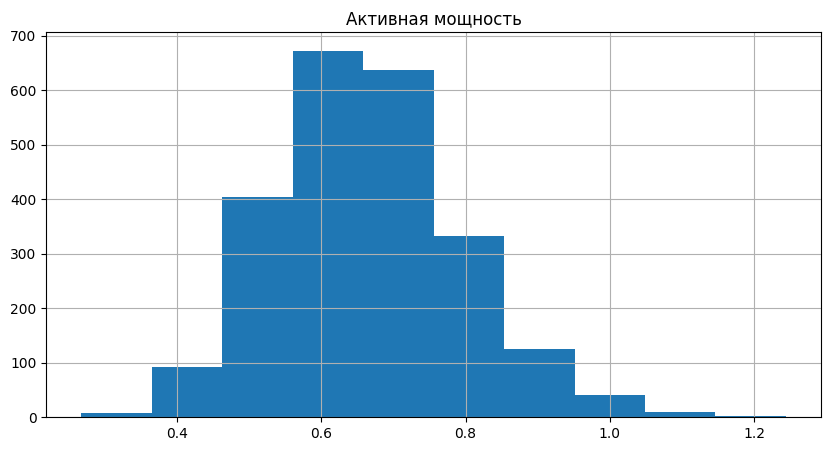

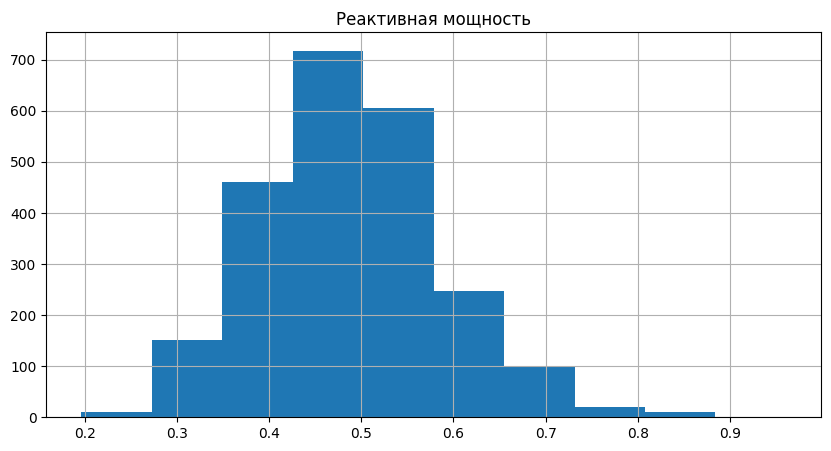

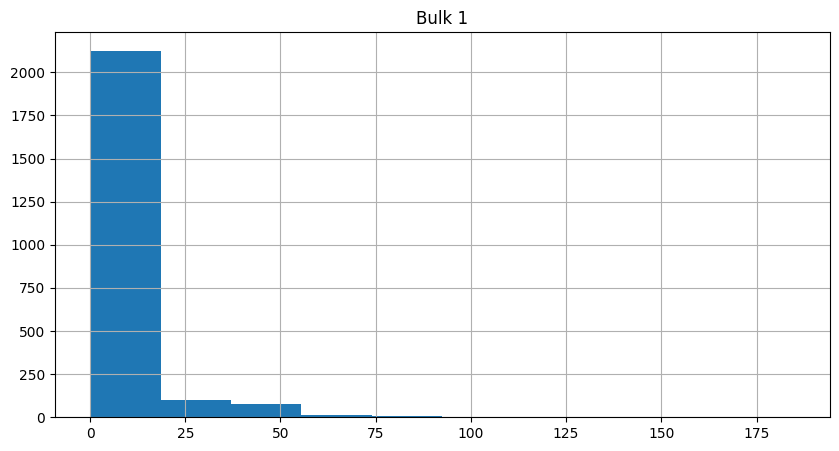

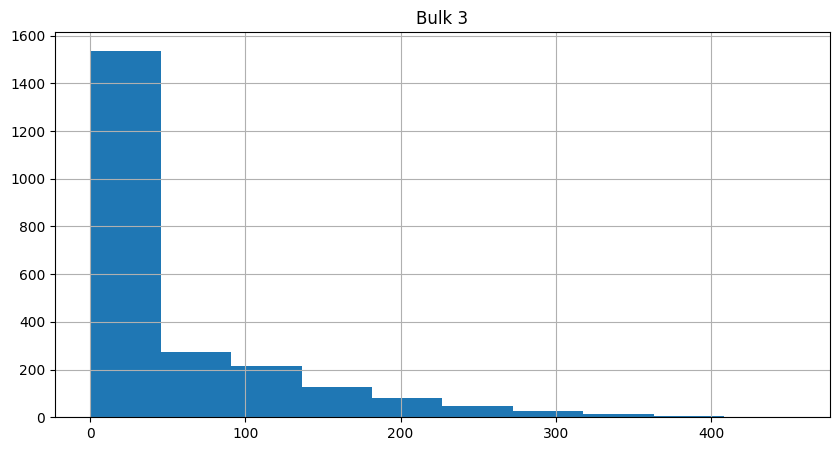

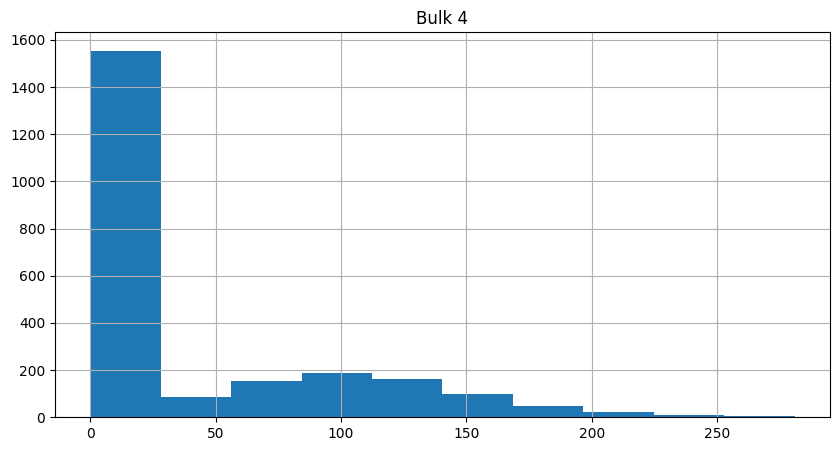

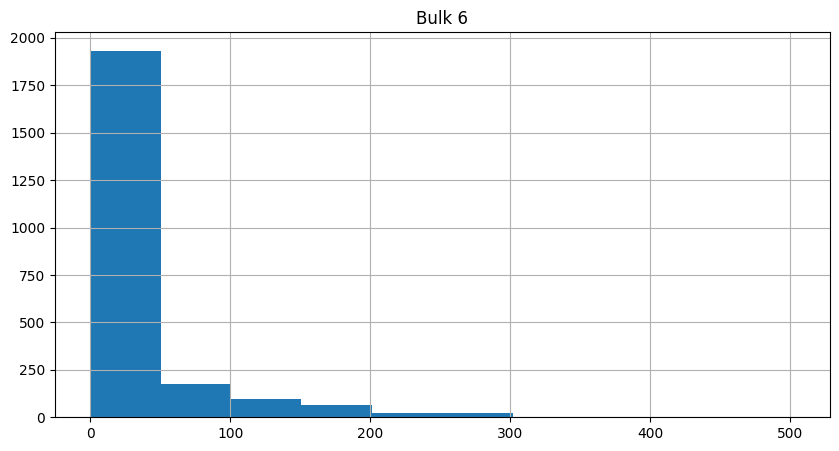

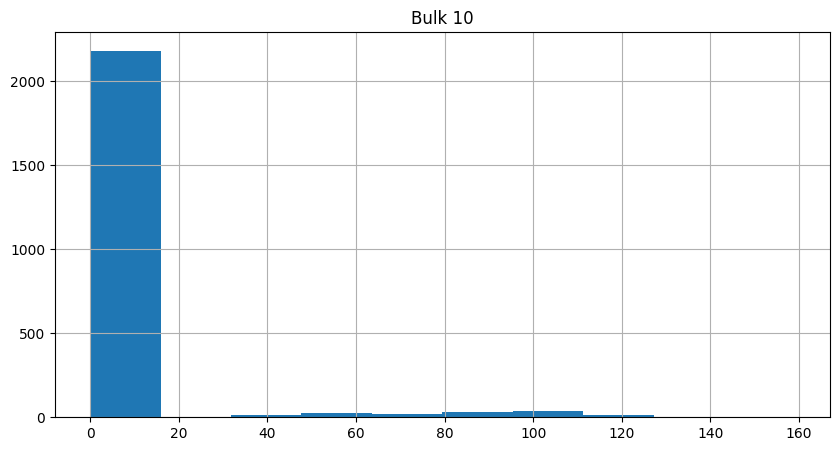

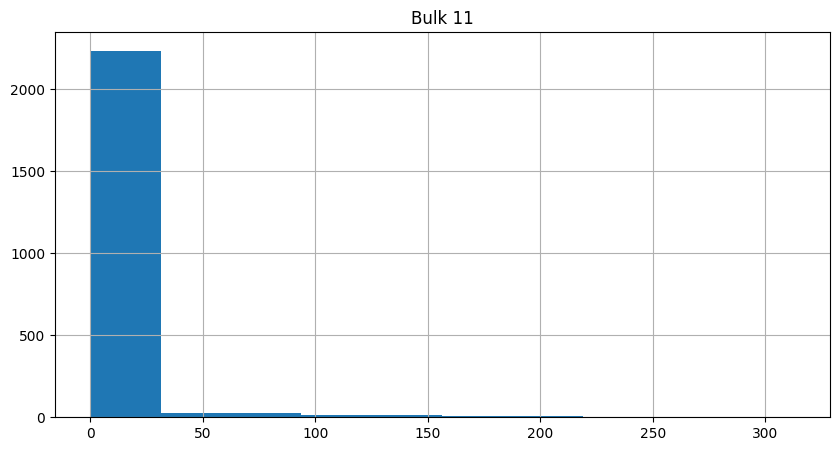

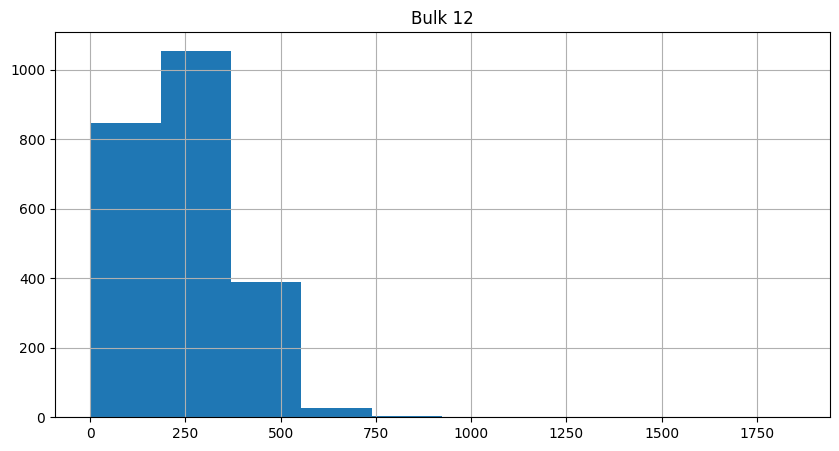

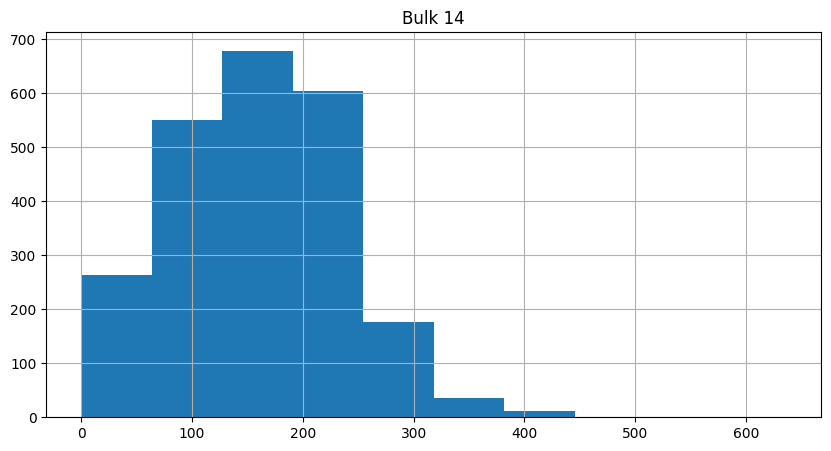

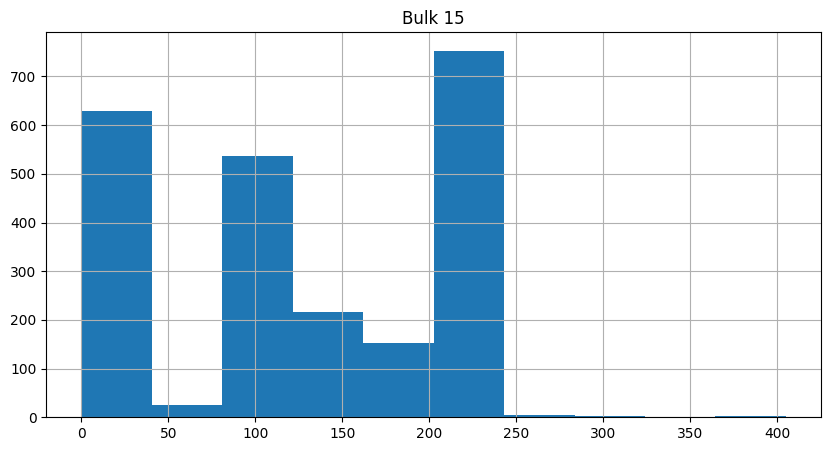

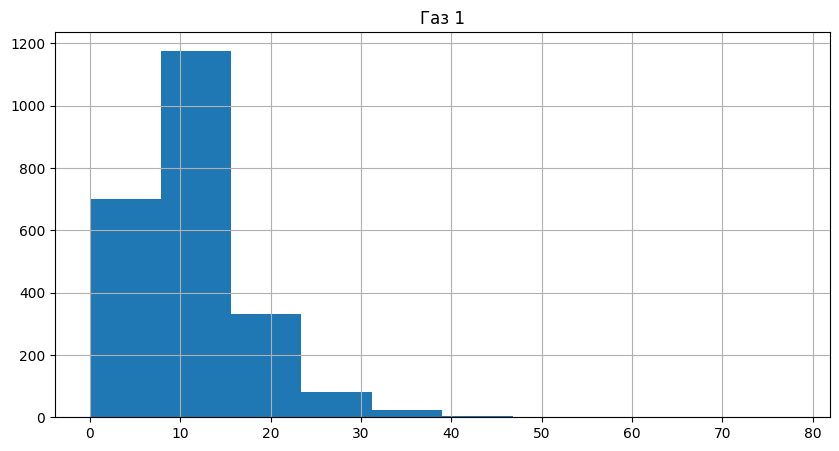

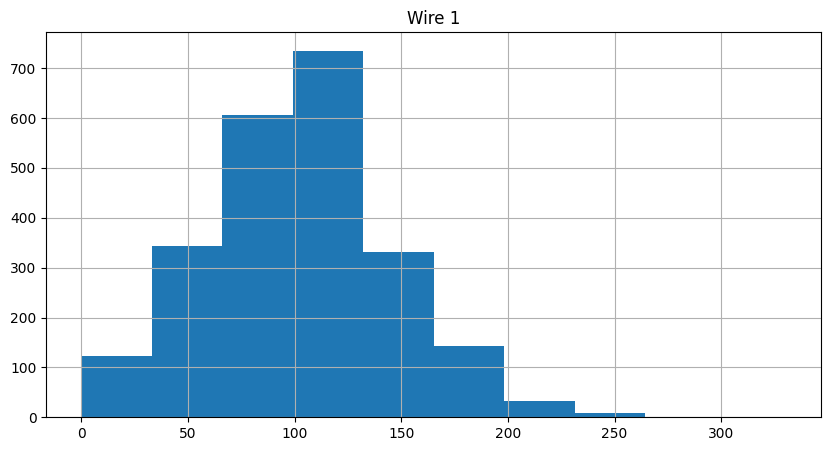

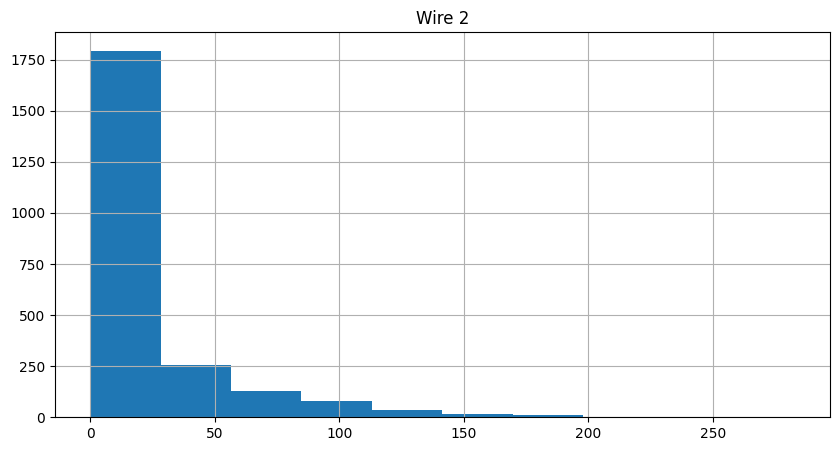

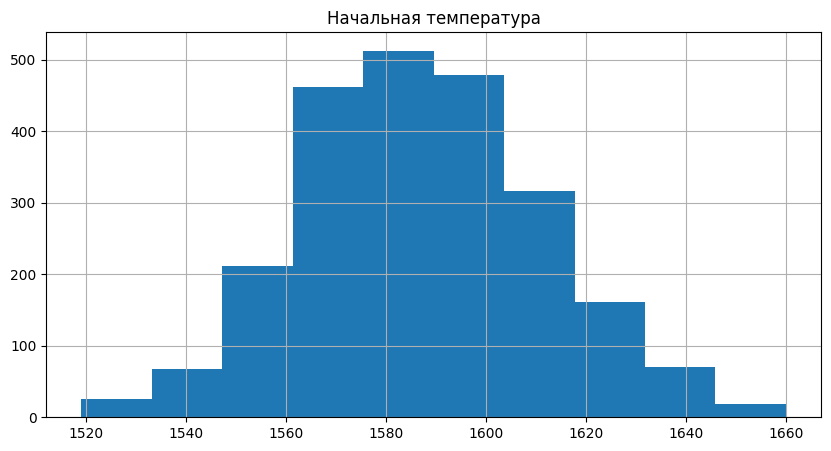

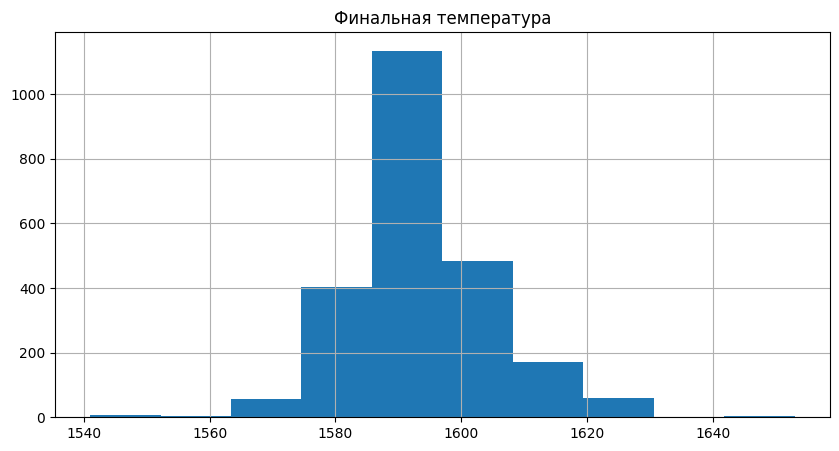

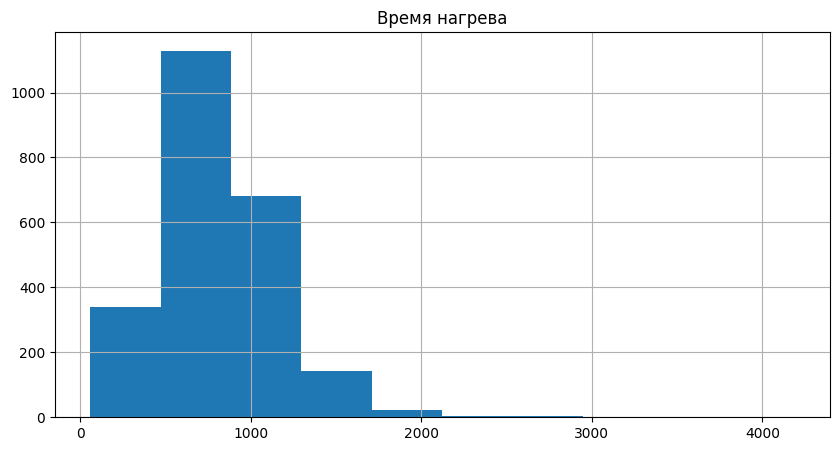

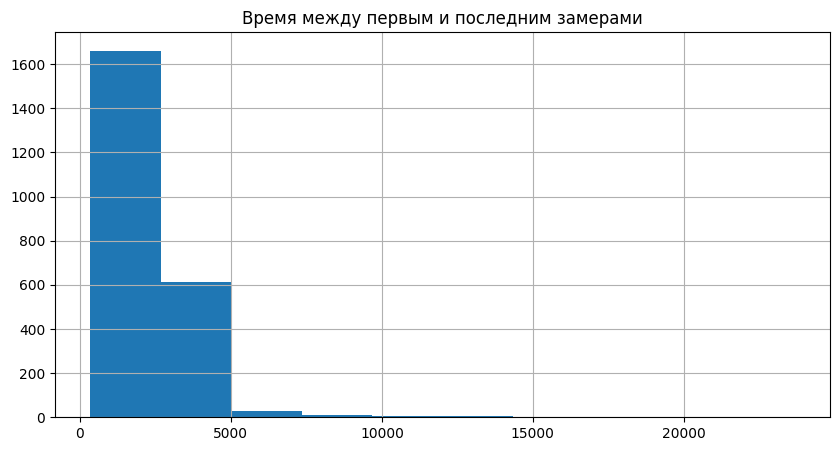

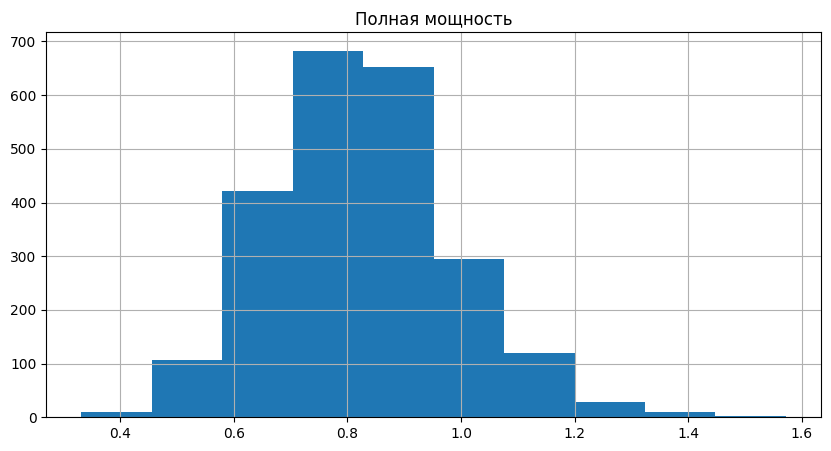

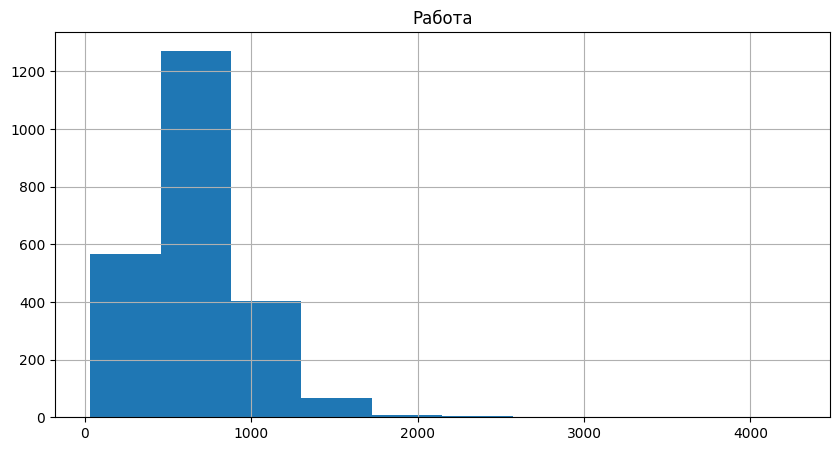

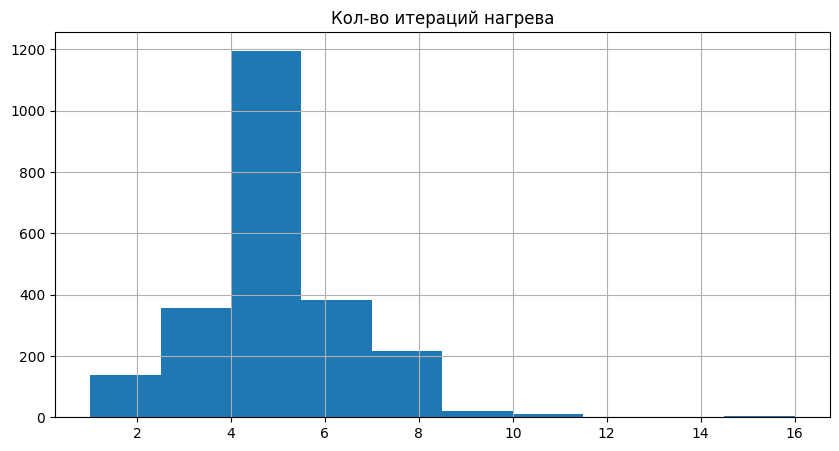

In [15]:
print(df_full.shape)
for col in df_full.columns:
    df_full.hist(column=col, figsize=(10,5));

Выведем корреляционную матрицу

In [16]:
df_full.corr().style.background_gradient(cmap ='seismic')\
.set_properties(**{'font-size': '12px'})

,Активная мощность,Реактивная мощность,Bulk 1,Bulk 3,Bulk 4,Bulk 6,Bulk 10,Bulk 11,Bulk 12,Bulk 14,Bulk 15,Газ 1,Wire 1,Wire 2,Начальная температура,Финальная температура,Время нагрева,Время между первым и последним замерами,Полная мощность,Работа,Кол-во итераций нагрева
Активная мощность,1.000000,0.965423,0.022643,0.026937,0.022286,-0.000672,-0.007356,0.017459,0.038133,0.020183,0.039638,0.039521,0.036433,-0.014436,-0.007456,0.039896,0.048871,0.024684,0.995478,0.404909,0.032865
Реактивная мощность,0.965423,1.000000,0.018376,0.022924,0.022931,-0.001655,-0.010787,0.015755,0.042129,0.016013,0.037966,0.041092,0.043559,-0.014346,-0.002404,0.032716,0.042863,0.024076,0.985814,0.395850,0.031713
Bulk 1,0.022643,0.018376,1.000000,-0.011538,0.041662,-0.003581,-0.023333,-0.038008,0.325724,0.207606,-0.001211,0.234089,0.013823,-0.009261,0.079098,-0.075428,0.102708,0.144429,0.021155,0.103836,0.097689
Bulk 3,0.026937,0.022924,-0.011538,1.000000,-0.295526,0.066316,-0.085266,-0.007383,0.018059,0.011209,-0.013181,0.059665,0.037788,0.094897,-0.113380,-0.037156,0.091603,0.023019,0.025674,0.089826,0.107308
Bulk 4,0.022286,0.022931,0.041662,-0.295526,1.000000,-0.251577,-0.084975,-0.119733,0.105190,-0.091103,0.100833,0.017532,0.298145,-0.268115,0.165484,0.187817,-0.029086,0.002019,0.022658,-0.021537,-0.004955
Bulk 6,-0.000672,-0.001655,-0.003581,0.066316,-0.251577,1.000000,-0.097218,0.196983,-0.112169,0.176791,-0.108626,0.139574,-0.235445,0.205432,-0.127046,-0.180906,0.162777,0.154967,-0.001145,0.148117,0.153168
Bulk 10,-0.007356,-0.010787,-0.023333,-0.085266,-0.084975,-0.097218,1.000000,-0.045666,0.027651,-0.045880,0.051953,-0.008634,0.062892,-0.103828,0.035789,0.061227,-0.005427,-0.009052,-0.008732,-0.009965,0.012517
Bulk 11,0.017459,0.015755,-0.038008,-0.007383,-0.119733,0.196983,-0.045666,1.000000,-0.040419,0.077966,-0.048571,0.041945,-0.117798,0.062074,-0.110430,-0.114936,0.077959,0.038518,0.016956,0.074529,0.062526
Bulk 12,0.038133,0.042129,0.325724,0.018059,0.105190,-0.112169,0.027651,-0.040419,1.000000,0.481609,0.613870,0.216969,0.170812,-0.098208,-0.079574,0.266805,0.466002,0.209555,0.039688,0.432350,0.306377
Bulk 14,0.020183,0.016013,0.207606,0.011209,-0.091103,0.176791,-0.045880,0.077966,0.481609,1.000000,0.264903,0.268284,-0.052654,0.037017,-0.179991,0.114893,0.461035,0.173886,0.018605,0.415292,0.333801


### Обучение модели

#### Подготовка к обучению

Чтобы решить стоящую перед нами задачу регрессии, были выбраны следующие модели:

- **ElasticNet**

- **Epsilon-Support Vector Regression**

- **Random Forest**
    
- **LightGBM**

Разделим данные на обучающую(75%) и тестовую (25%) выборки

In [17]:
X = df_full.drop('Финальная температура', axis=1)
y = df_full['Финальная температура']

X_train, X_test, y_train, y_test = \
train_test_split(X, y,
                 test_size=0.25,
                 random_state=state)

X_train.shape

(1743, 20)

Проверим, как между выборками распределились выбросы

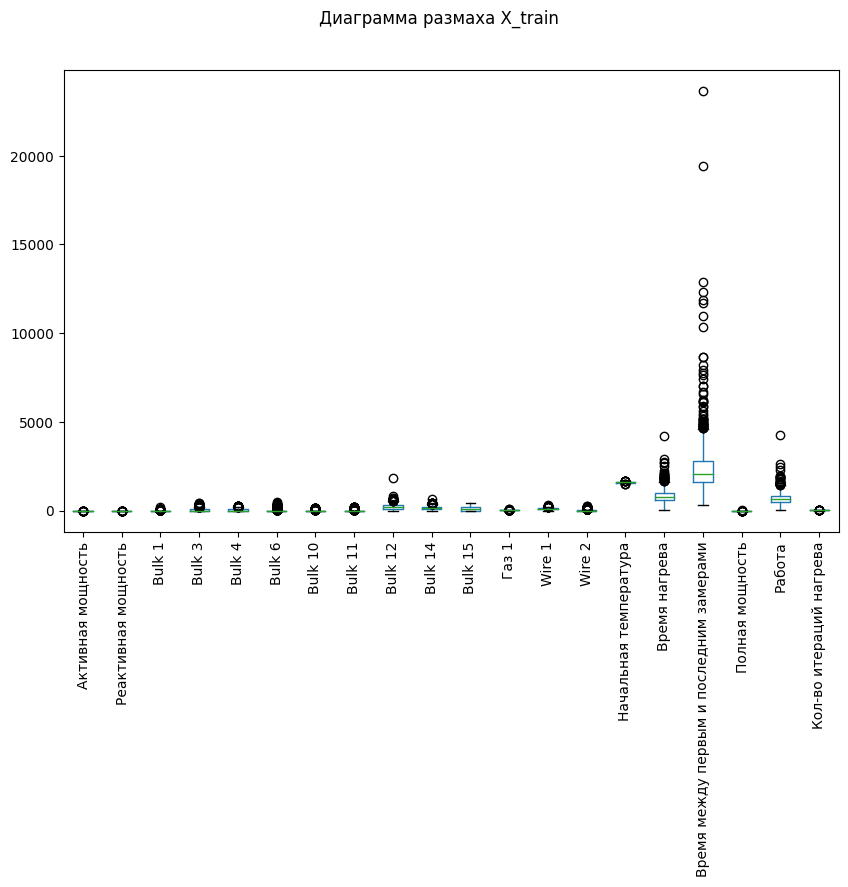

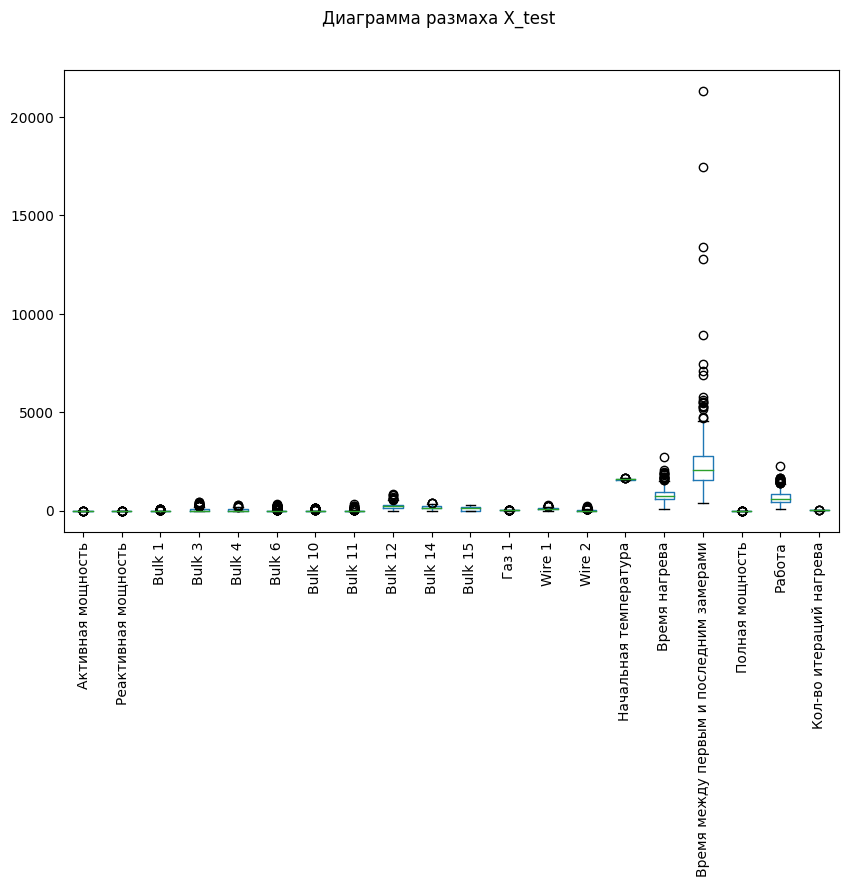

In [18]:
for df, name in zip([X_train, X_test], ['X_train', 'X_test']):
    df.plot(kind='box', figsize=(10,6))
    plt.suptitle("Диаграмма размаха "+name)
    plt.xticks(rotation=90)

Устраним коллинеарность и стандартизируем признаки для линейных моделей.

In [19]:
X_train_st = X_train.copy()
X_test_st = X_test.copy()

to_drop = ['Активная мощность', 
           'Реактивная мощность', 
           'Время между первым и последним замерами',
           'Работа']

X_train_st.drop(to_drop, axis=1, inplace=True)
X_test_st.drop(to_drop, axis=1, inplace=True)

transformer = StandardScaler().fit(X_train)

X_train_st = transformer.transform(X_train)
X_test_st = transformer.transform(X_test)

#### Обучение базовых моделей

Выбранные модели будут протестированы методом кросс-валидации без изменения гиперпараметров.

In [20]:
estimators = [
    ElasticNet(random_state=state),
    SVR(),
    RandomForestRegressor(n_jobs=-1, random_state=state),
    LGBMRegressor(n_jobs=-1, random_state=state, verbosity=-1)
]

results_dict = {}

for est in estimators:
    model_name = type(est).__name__
    if (model_name == 'ElasticNet') or (model_name == 'SVR'):
        scores = cross_val_score(est, X_train_st, y_train, scoring='neg_mean_absolute_error', cv=5)
    else:
        scores = cross_val_score(est, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    score = abs(scores.mean())
    results_dict[model_name] = score

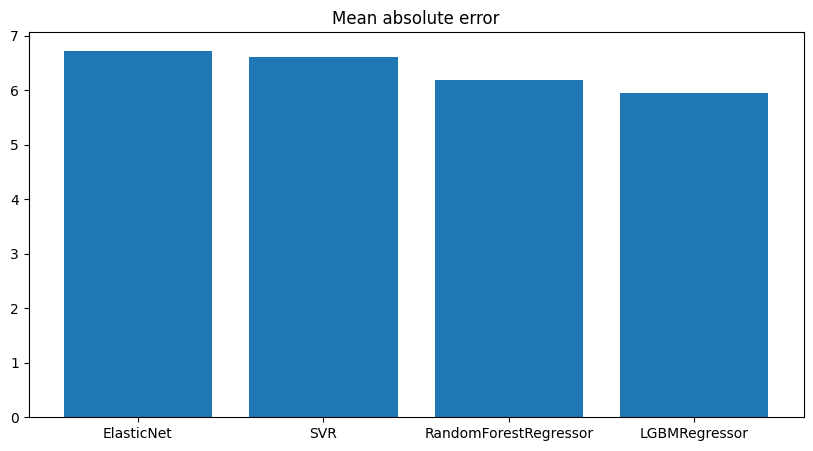

ElasticNet: 6.724186040164435
SVR: 6.610008537242324
RandomForestRegressor: 6.191765882817902
LGBMRegressor: 5.953930113445557


In [21]:
names = list(results_dict.keys())
values = list(results_dict.values())
plt.figure(figsize=(10,5))
plt.title('Mean absolute error')
plt.bar(range(len(results_dict)), values, tick_label=names)
plt.show();
for key, value in results_dict.items():
    print(key+':', value)

Лучший результат показывает CatBoostRegressor, MAE = 5.83

#### Подбор гиперпараметров

In [22]:
def rs(est, params, cv=5):
    rs_cv = RandomizedSearchCV(est,
                               params, 
                               cv=cv, 
                               n_iter=300, 
                               n_jobs=-1, 
                               verbose=-1, 
                               scoring='neg_mean_absolute_error',
                               random_state=state)
    rs_cv.fit(X_train,y_train)
    rs_df = pd.DataFrame(rs_cv.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
    return rs_df
    

def gs(est, params, cv=5):
    gs_cv = GridSearchCV(est,
                         params, 
                         cv=cv,
                         n_jobs=-1,
                         scoring='neg_mean_absolute_error')

    gs_cv.fit(X_train,y_train)
    print(gs_cv.best_estimator_)
    print(gs_cv.best_score_)

Подберём для LGBMRegressor оптимальные гиперпараметры.

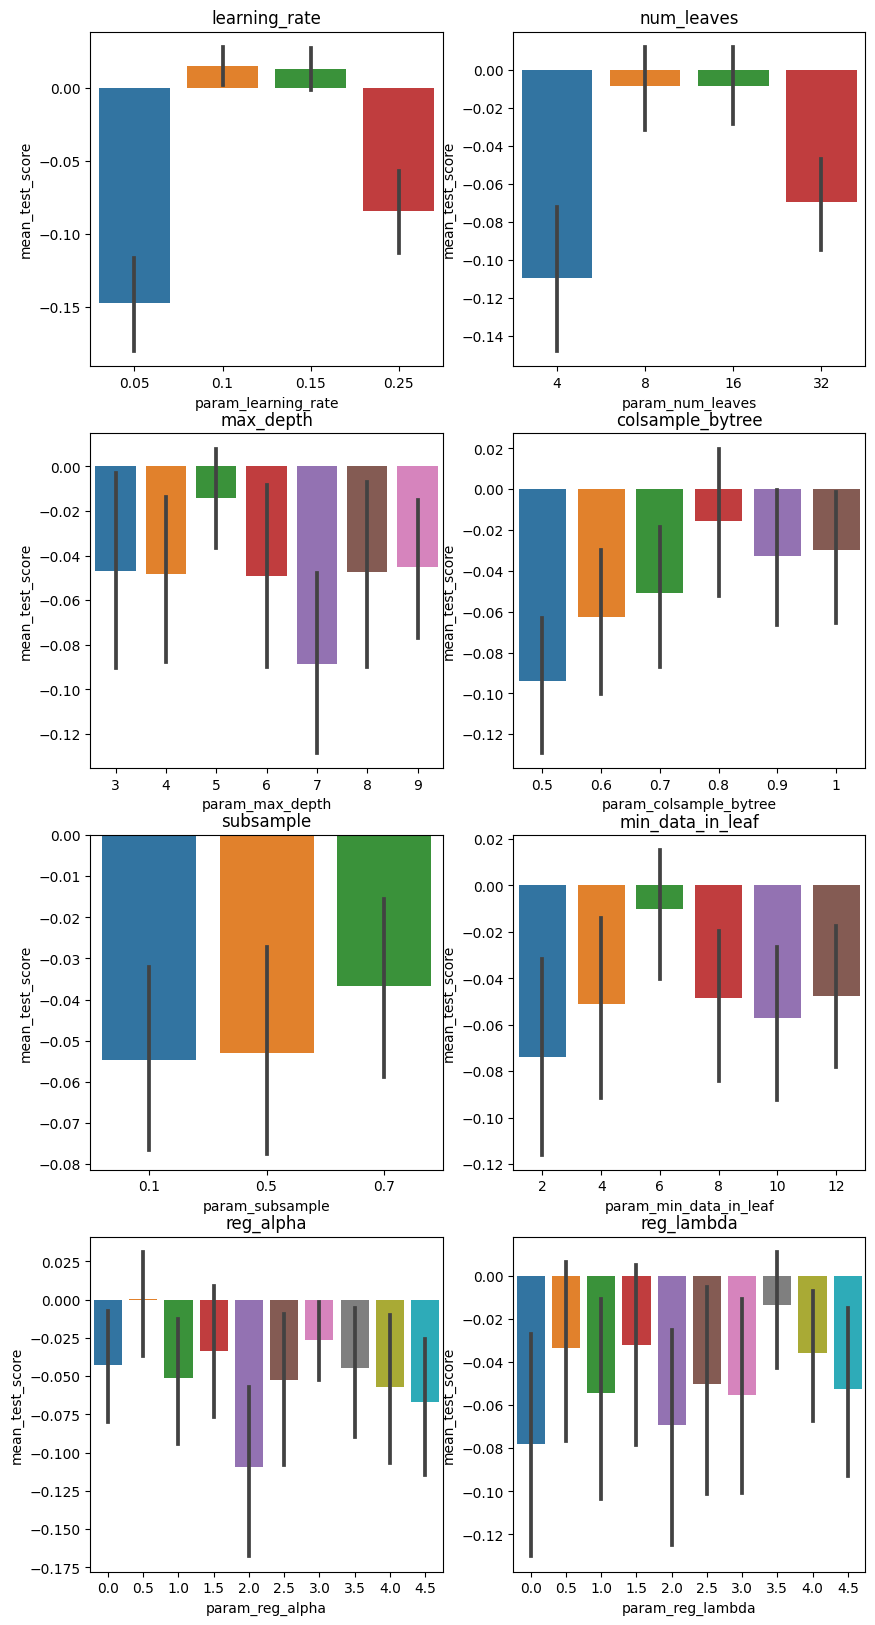

In [23]:
estimator = LGBMRegressor()

rs_params = {
    'learning_rate': [0.05, 0.1, 0.15, 0.25],
    'num_leaves': [4, 8, 16, 32],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9],
    'random_state' : [state], 
    'colsample_bytree' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'subsample' : [0.1, 0.5, 0.7],
    'min_data_in_leaf':np.arange(2, 13, 2),
    'reg_alpha': np.arange(0, 5, 0.5),
    'reg_lambda': np.arange(0, 5, 0.5),
    'verbose':[-1]
}

rs_df = rs(estimator, rs_params)

# приблизить mean_test_score к нулю для улучшения читаемости графиков
rs_df['mean_test_score'] = rs_df['mean_test_score'] + 6

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(10,20))
sns.barplot(x='param_learning_rate', y='mean_test_score', data=rs_df, ax=axs[0,0])
axs[0,0].set_title(label = 'learning_rate')
sns.barplot(x='param_num_leaves', y='mean_test_score', data=rs_df, ax=axs[0,1])
axs[0,1].set_title(label = 'num_leaves')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,0])
axs[1,0].set_title(label = 'max_depth')
sns.barplot(x='param_colsample_bytree', y='mean_test_score', data=rs_df, ax=axs[1,1])
axs[1,1].set_title(label = 'colsample_bytree')
sns.barplot(x='param_subsample', y='mean_test_score', data=rs_df, ax=axs[2,0])
axs[2,0].set_title(label = 'subsample')
sns.barplot(x='param_min_data_in_leaf', y='mean_test_score', data=rs_df, ax=axs[2,1])
axs[2,1].set_title(label = 'min_data_in_leaf')
sns.barplot(x='param_reg_alpha', y='mean_test_score', data=rs_df, ax=axs[3,0])
axs[3,0].set_title(label = 'reg_alpha')
sns.barplot(x='param_reg_lambda', y='mean_test_score', data=rs_df, ax=axs[3,1])
axs[3,1].set_title(label = 'reg_lambda')
plt.show();

In [35]:
gs_params = {
    'learning_rate': [0.1,0.15],
    'max_depth' : [5],
    'num_leaves':  [16],
    'random_state' : [state],
    'colsample_bytree':[0.8,0.9,1],
    'subsample' : [0.1, 0.7],
    'min_data_in_leaf': [2,4,6],
    'reg_alpha': [0.5,1.5,3],
    'reg_lambda': [0.5,1.5,3.5,4],
    'verbose':[-1]
}

gs(LGBMRegressor(), gs_params)

LGBMRegressor(colsample_bytree=0.9, max_depth=5, min_data_in_leaf=4,
              num_leaves=16, random_state=170723, reg_alpha=0.5, reg_lambda=0.5,
              subsample=0.1, verbose=-1)
-5.801058502035879


#### Проверка на тестовой выборке

In [36]:
model = LGBMRegressor(colsample_bytree=0.9, 
                      max_depth=5, min_data_in_leaf=4,
                      num_leaves=16, random_state=state, 
                      reg_alpha=0.5, reg_lambda=0.5,
                      subsample=0.1, verbose=-1,
                      importance_type='gain').fit(X_train, y_train)

In [37]:
y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

5.7752346175708675


#### Сравнение с DummyRegressor

In [27]:
dummy = DummyRegressor().fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print(mean_absolute_error(y_test, y_pred_dummy))

8.09939931844417


Обученная модель предсказывает температуру с меньшей ошибкой.

### Общий вывод

Посмотрим, какие признаки имеют максимальную значимость для модели

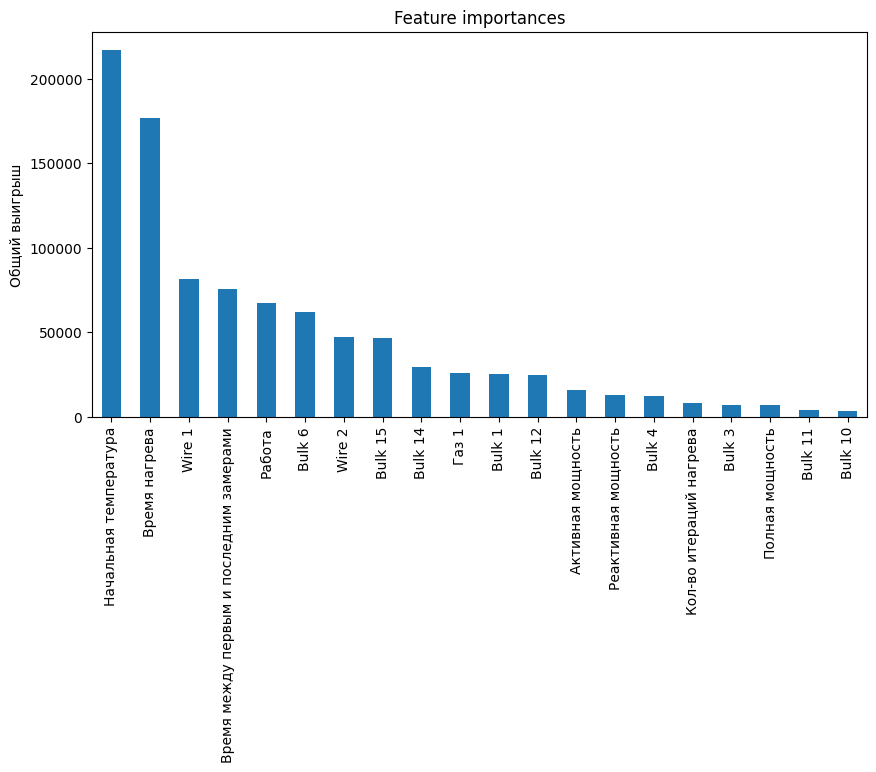

In [38]:
model_importances = pd.Series(
    model.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,5))
model_importances.plot(kind='bar')
plt.title("Feature importances")
plt.ylabel("Общий выигрыш")
fig.tight_layout()

Если компании потребуется ускорить рассчёты, рационально будет пожертвовать некоторыми не сильно значимыми признаками.

Рассчитаем метрику r2 для финальной модели на тестовой выборке:

In [29]:
r2_score(y_test, y_pred)

0.47749340380178085

Такое значение не идёт в разрез с относительно высоким MAE. Возможно, с большим кол-вом данных модель показала бы лучший результат.

Применение машинного обучения для предсказания температуры стали представляет собой перспективное решение для металлургического комбината, которое может принести значительные экономические и экологические выгоды. Однако важно следить за непрерывным улучшением и оптимизацией производственных процессов для достижения максимальных результатов. В данных присутствовали ключи с единичными замерами температур, возможно предприятию стоит заменить или перенастроить датчики, которые служат для измерений.

### Отчёт о проделанной работе

#### Сравнение с планом

Все шаги в работе были выполненны согласно плану, однако были добавлены некоторые дополнительные шаги:
   1) После объединения данных в один датафрейм, были сгенерированы дополнительные признаки (время нагрева, время между замерами, полная мощность, работа).
   2) После разделения данных на обучающую и тестовую выборки, эти выборки были дополнительно стандартизированы и очищены от коллинеарных признаков - подготовлены для работы с линейными моделями.
   3) После проверки лучшей модели на тестовой выборке было дополнительно добавлено сравнение результатов с предсказаниями DummyRegressor (стратегия заполнения - средним)

#### Трудности и решения

По своей невнимательности неверно рассчитала время нагрева (не заметила, что между итерациями нагрева есть паузы), что сильно сказалось точности моделей. После устранения ошибки, точность значительно улучшилась, результаты подбора гиперпараметров стали лучше интерпретироваться, фактически все подобранные модели проходили нижнюю границу требования по МАЕ. Других трудностей не возникло.

#### Ключевые шаги решения

- Предобработка на основании исследовательского анализа данных позволила верно определить и обработать строки с ошибками (единичные замеры температуры, неверный показатель мощности)
- Генерация новых признаков позволила на основании уже имеющихся данных обогатить относительно небольшой датасет и значительно улучшила качество предсказаний (без дополнительных признаков у лучшей модели показатель МАЕ не опускался бы ниже 7.5)
- В имеющихся данных присутствовали выбросы, от модели требовалось адекватно их обрабатывать, ведь эти выбросы - не ошибки, а реальные производственные данные. Не все модели, одинаково хорошо способны отличить такие строки и дать по ним предсказания с минимальной ошибкой.

#### Используемые признаки

Было принято решение максимально использовать имеющиеся данные, поэтому из данных удалены только те признаки, 95% значений которых были пустыми. Для обучения финальной модели использовались следующие признаки (в порядке значимости для модели):

 - Финальная температура - целевой признак, взят из датафрейма data_temp_new (значение температуры последнего замера)

1) Начальная температура - признак взят из датафрейма data_temp_new (значение температуры первого замера)
2) Время нагрева - признак рассчитан с помощью данных из датафрейма data_temp_new (рассчёт по ключу - от времени последнего замера отнято время первого)
3) Wire 1 - пропущенные значения заполнены нулями
4) Время между первым и последним замерами - признак рассчитан с помощью данных из датафрейма data_temp_new (рассчёт по ключу - от времени последнего замера отнято время первого)
5) Работа - признак рассчитан по полной мощности и временем нагрева (Произведение полной мощности и времени нагрева)
6) Bulk 6  - пропущенные значения заполнены нулями
7) Wire 2  - пропущенные значения заполнены нулями
8) Bulk 15  - пропущенные значения заполнены нулями
9) Bulk 14  - пропущенные значения заполнены нулями
10) Газ 1  - пропущенные значения заполнены нулями
11) Bulk 1  - пропущенные значения заполнены нулями
12) Bulk 12  - пропущенные значения заполнены нулями
13) Активная мощность - признак агрегирован как среднее всех значений по ключу 
14) Реактивная мощность - признак агрегирован как среднее всех значений по ключу 
15) Bulk 4  - пропущенные значения заполнены нулями
16) Кол-во итераций нагрева - рассчитано по кол-ву строк с одинаковым ключом из датафрейма data_arc_new
17) Bulk 3  - пропущенные значения заполнены нулями
18) Полная мощность - признак рассчитан по активной и реактивной мощности (кв. корень из суммы квадратов акт. и реакт. мощности)
19) Bulk 11  - пропущенные значения заполнены нулями
20) Bulk 10 - пропущенные значения заполнены нулями

Также из данных были по ключам удалены данные, содержащие аномальную реактивную мощность (-700), низкие температуры (< 1500) и единичный замер температуры.

Убрав из данных признаки с 13 по 20, мы лишь немного уменьшим качество предсказаний (МАЕ=5.82 на тестовой, что лишь на 0.03 больше результата лучшей модели, обученной на 20 признаках)

#### Описание лучшей модели

Лучший результат показала модель LGBMRegressor - регрессор на градиентном спуске с гиперпараметрами:

    - num_leaves=16
    - max_depth=5
    - min_data_in_leaf=4
    - subsample=0.1
    - colsample_bytree=0.9
    - reg_alpha=0.5
    - reg_lambda=0.5
    - random_state=170723

Также были применены гиперпараметры `n_jobs=-1` (использовать распараллеливание для ускорения обучения) и `importance_type='gain'` (чтобы показать общий выигрыш от сплитов по признакам на графике), которые не влияли на качество обучения. Обученная модель с подобранными гиперпараметрами показала на тестовой выборке результат МАЕ = 5.78.